# References
- https://github.com/thekimk/All-About-Time-Series-Analysis/
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

# Installing and Importing Libraries

In [1]:
!pip3 install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima.arima.utils import ndiffs


np.random.seed(0)
rng = np.random.default_rng()

# 1. Linear Models

## 1-1. MA

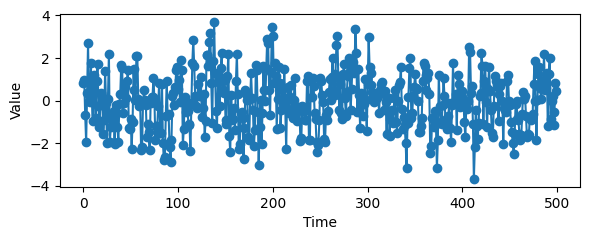

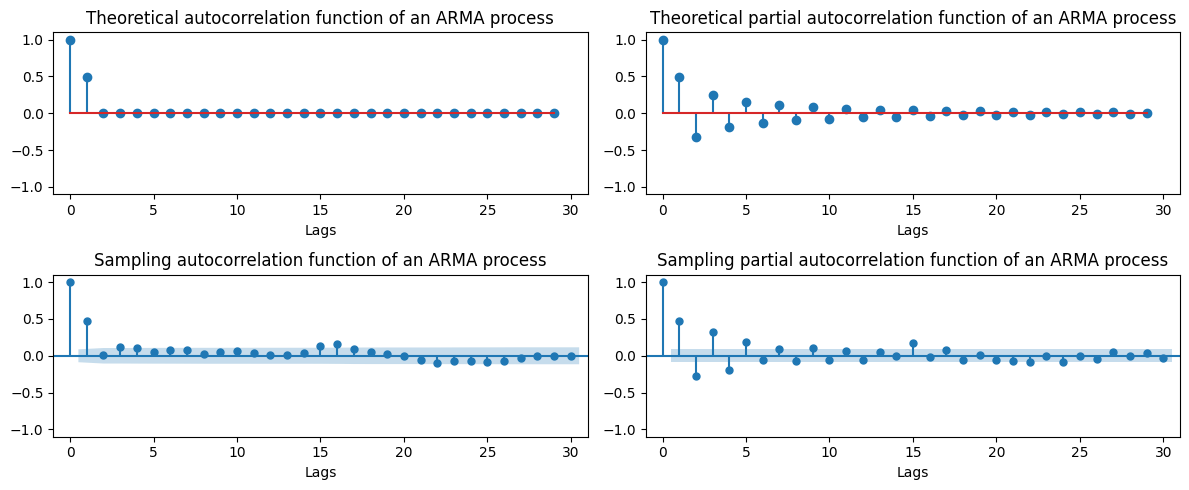

In [3]:
# MA(1)

maparams = [0.9]
arma_process = ArmaProcess(ma=np.r_[1, maparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal)
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0, 0].stem(arma_process.acf(lags=lags), use_line_collection=True)
ax[0, 0].set_title("Theoretical autocorrelation function of an ARMA process")
ax[0, 1].stem(arma_process.pacf(lags=lags), use_line_collection=True)
ax[0, 1].set_title("Theoretical partial autocorrelation function of an ARMA process")
plot_acf(y, ax=ax[1, 0], lags=lags)
ax[1, 0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1, 1], lags=lags, method='ywm')
ax[1, 1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  for j in range(2):
    ax[i, j].set_xlim(-1, lags + 1)
    ax[i, j].set_ylim(-1.1, 1.1)
    ax[i, j].set_xlabel('Lags')

plt.tight_layout()
plt.show()

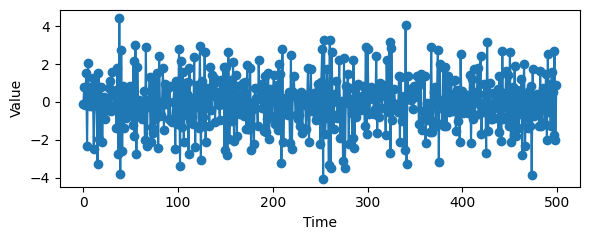

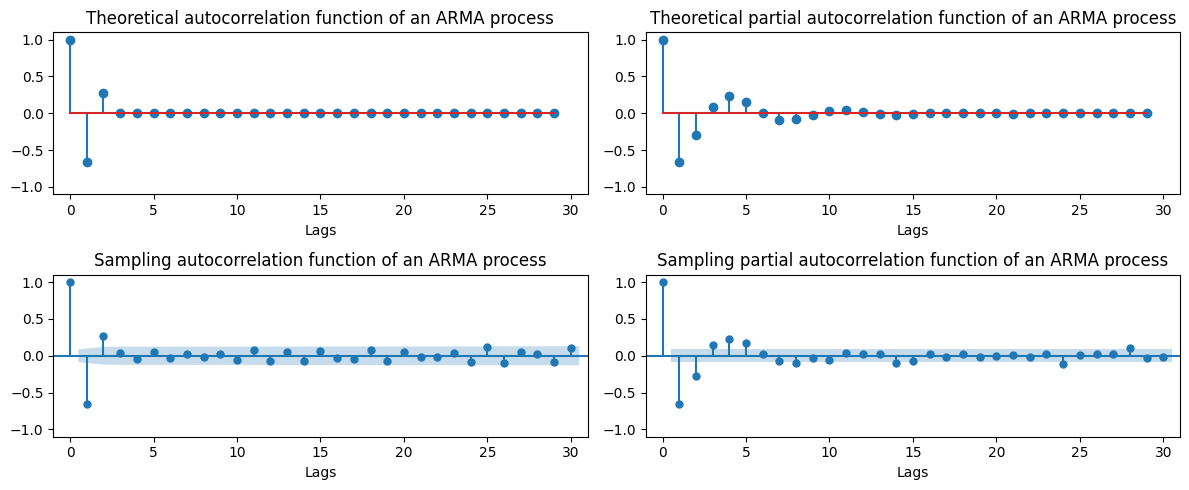

In [4]:
# MA(2)

maparams = [-0.9, 0.6]
arma_process = ArmaProcess(ma=np.r_[1, maparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal)
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0, 0].stem(arma_process.acf(lags=lags), use_line_collection=True)
ax[0, 0].set_title("Theoretical autocorrelation function of an ARMA process")
ax[0, 1].stem(arma_process.pacf(lags=lags), use_line_collection=True)
ax[0, 1].set_title("Theoretical partial autocorrelation function of an ARMA process")
plot_acf(y, ax=ax[1, 0], lags=lags)
ax[1, 0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1, 1], lags=lags, method='ywm')
ax[1, 1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  for j in range(2):
    ax[i, j].set_xlim(-1, lags + 1)
    ax[i, j].set_ylim(-1.1, 1.1)
    ax[i, j].set_xlabel('Lags')

plt.tight_layout()
plt.show()

## 1-2. AR

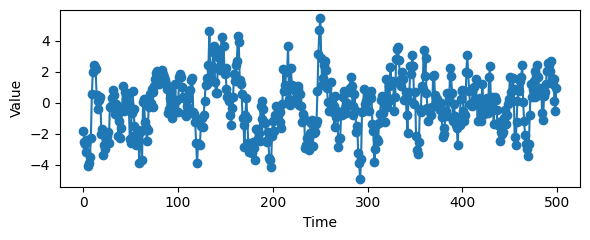

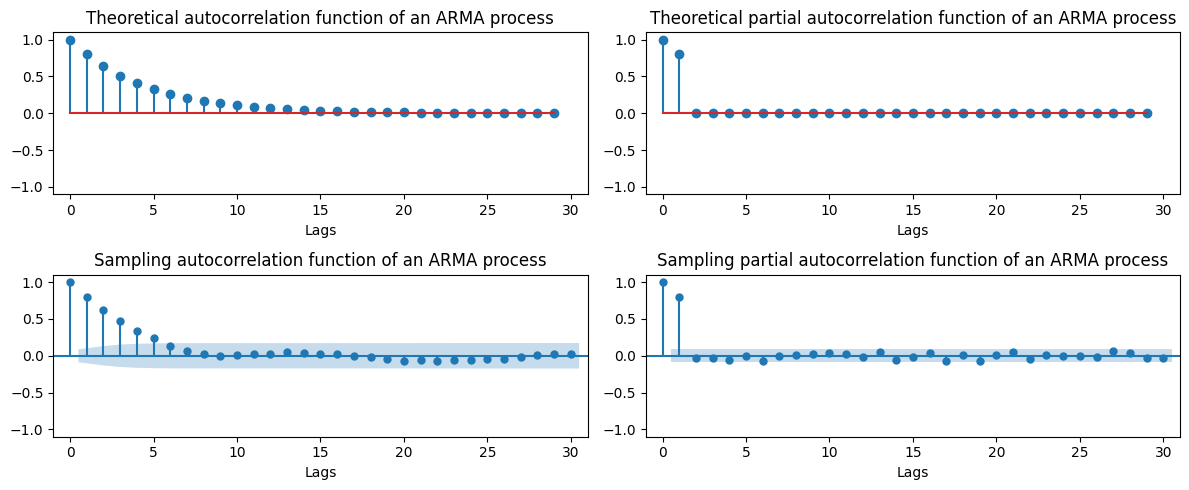

In [5]:
# AR(1)

arparams = np.array([0.8])
arma_process = ArmaProcess(ar=np.r_[1, -arparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal)
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0, 0].stem(arma_process.acf(lags=lags), use_line_collection=True)
ax[0, 0].set_title("Theoretical autocorrelation function of an ARMA process")
ax[0, 1].stem(arma_process.pacf(lags=lags), use_line_collection=True)
ax[0, 1].set_title("Theoretical partial autocorrelation function of an ARMA process")
plot_acf(y, ax=ax[1, 0], lags=lags)
ax[1, 0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1, 1], lags=lags, method='ywm')
ax[1, 1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  for j in range(2):
    ax[i, j].set_xlim(-1, lags + 1)
    ax[i, j].set_ylim(-1.1, 1.1)
    ax[i, j].set_xlabel('Lags')

plt.tight_layout()
plt.show()

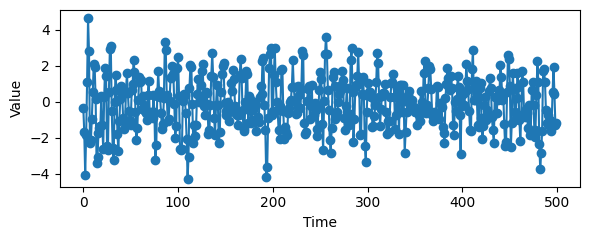

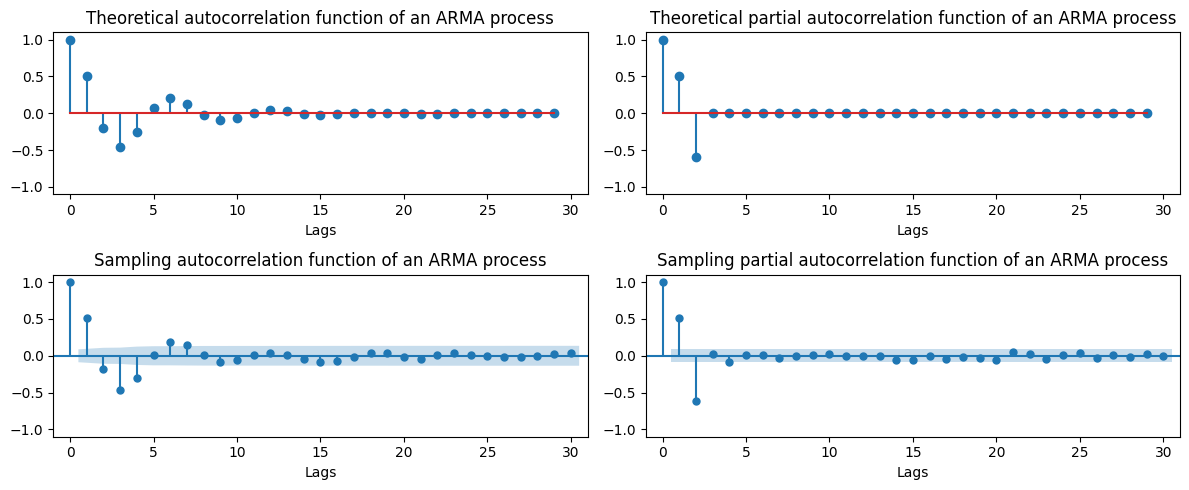

In [6]:
# AR(2)

arparams = np.array([0.8, -0.6])
arma_process = ArmaProcess(ar=np.r_[1, -arparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal)
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0, 0].stem(arma_process.acf(lags=lags), use_line_collection=True)
ax[0, 0].set_title("Theoretical autocorrelation function of an ARMA process")
ax[0, 1].stem(arma_process.pacf(lags=lags), use_line_collection=True)
ax[0, 1].set_title("Theoretical partial autocorrelation function of an ARMA process")
plot_acf(y, ax=ax[1, 0], lags=lags)
ax[1, 0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1, 1], lags=lags, method='ywm')
ax[1, 1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  for j in range(2):
    ax[i, j].set_xlim(-1, lags + 1)
    ax[i, j].set_ylim(-1.1, 1.1)
    ax[i, j].set_xlabel('Lags')

plt.tight_layout()
plt.show()

## 1-3. ARMA

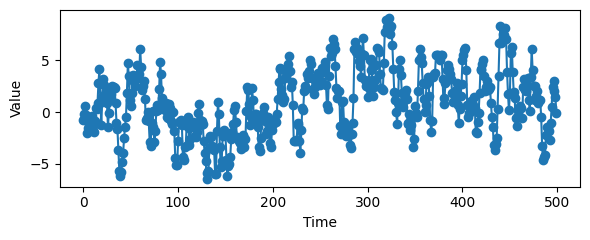

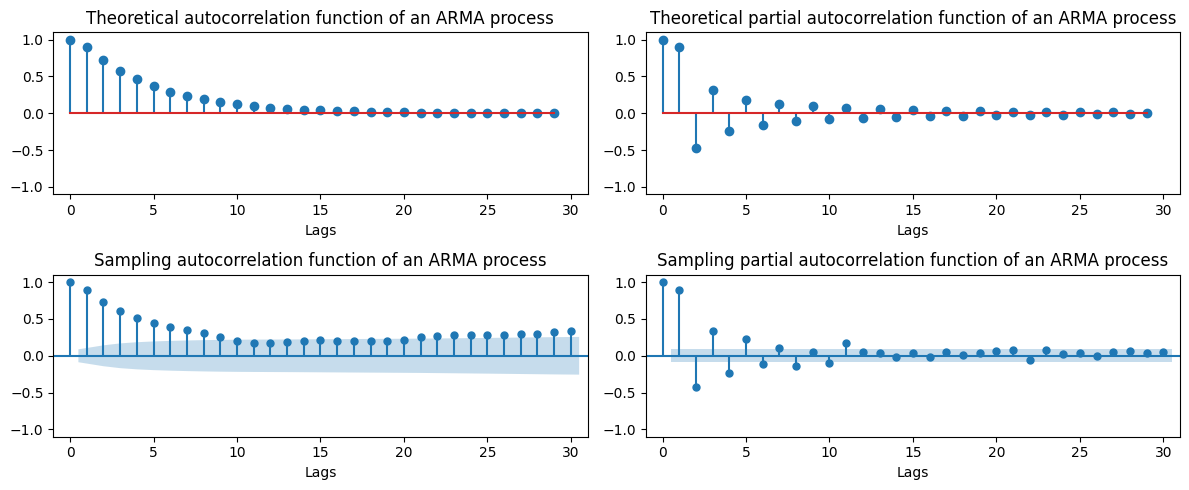

In [7]:
# ARMA(1,1)

arparams = np.array([0.8])
maparams = np.array([0.9])
arma_process = ArmaProcess(ar=np.r_[1, -arparams], ma=np.r_[1, maparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal)
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0, 0].stem(arma_process.acf(lags=lags), use_line_collection=True)
ax[0, 0].set_title("Theoretical autocorrelation function of an ARMA process")
ax[0, 1].stem(arma_process.pacf(lags=lags), use_line_collection=True)
ax[0, 1].set_title("Theoretical partial autocorrelation function of an ARMA process")
plot_acf(y, ax=ax[1, 0], lags=lags)
ax[1, 0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1, 1], lags=lags, method='ywm')
ax[1, 1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  for j in range(2):
    ax[i, j].set_xlim(-1, lags + 1)
    ax[i, j].set_ylim(-1.1, 1.1)
    ax[i, j].set_xlabel('Lags')

plt.tight_layout()
plt.show()

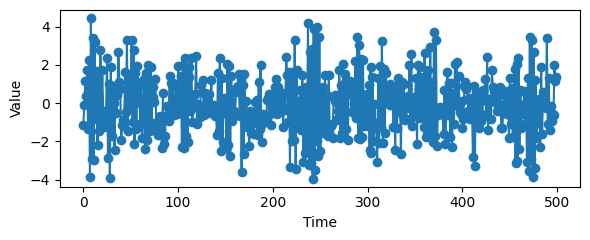

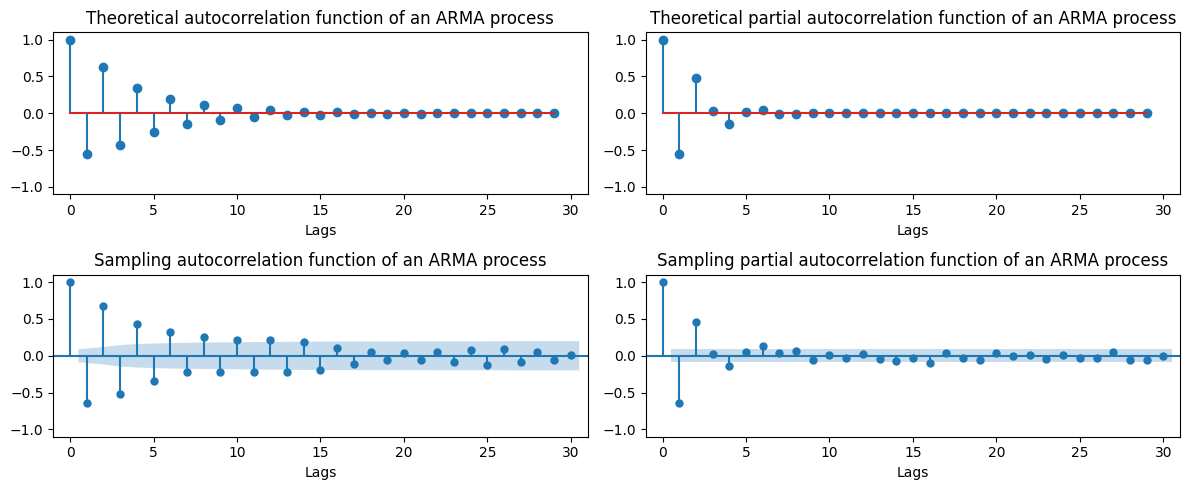

In [8]:
# ARMA(2,2)

arparams = np.array([0.5, -0.2])
maparams = np.array([0.2, 0.3])
arma_process = ArmaProcess(ar=np.r_[1, arparams], ma=np.r_[1, maparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal)
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0, 0].stem(arma_process.acf(lags=lags), use_line_collection=True)
ax[0, 0].set_title("Theoretical autocorrelation function of an ARMA process")
ax[0, 1].stem(arma_process.pacf(lags=lags), use_line_collection=True)
ax[0, 1].set_title("Theoretical partial autocorrelation function of an ARMA process")
plot_acf(y, ax=ax[1, 0], lags=lags)
ax[1, 0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1, 1], lags=lags, method='ywm')
ax[1, 1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  for j in range(2):
    ax[i, j].set_xlim(-1, lags + 1)
    ax[i, j].set_ylim(-1.1, 1.1)
    ax[i, j].set_xlabel('Lags')

plt.tight_layout()
plt.show()

## 1-4. ARIMA

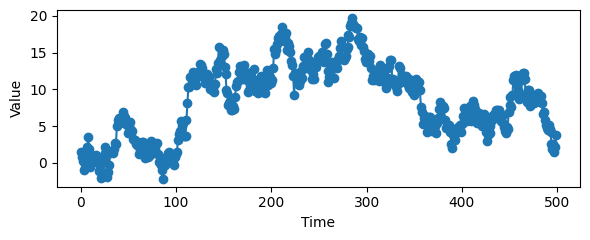

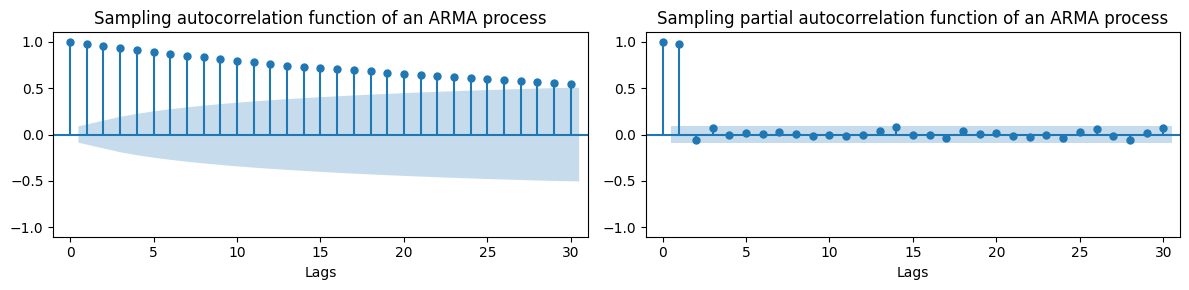

In [9]:
# ARIMA(0,1,0)

arparams = np.array([])
maparams = np.array([])
arma_process = ArmaProcess(ar=np.r_[1, -arparams], ma=np.r_[1, maparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal).cumsum()
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
plot_acf(y, ax=ax[0], lags=lags)
ax[0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1], lags=lags, method='ywm')
ax[1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  ax[i].set_xlim(-1, lags + 1)
  ax[i].set_ylim(-1.1, 1.1)
  ax[i].set_xlabel('Lags')

plt.tight_layout()
plt.show()

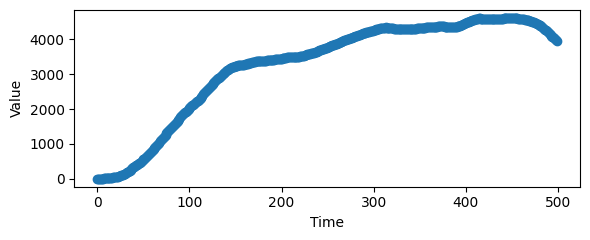

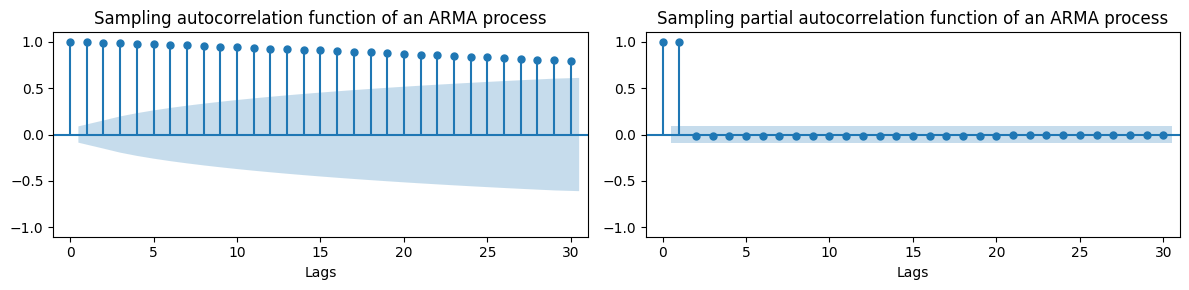

In [10]:
# ARIMA(1,2,1)

arparams = np.array([0.8])
maparams = np.array([-0.6])
arma_process = ArmaProcess(ar=np.r_[1, -arparams], ma=np.r_[1, maparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal).cumsum().cumsum()
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
plot_acf(y, ax=ax[0], lags=lags)
ax[0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1], lags=lags, method='ywm')
ax[1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  ax[i].set_xlim(-1, lags + 1)
  ax[i].set_ylim(-1.1, 1.1)
  ax[i].set_xlabel('Lags')

plt.tight_layout()
plt.show()

## 1-5. SARIMA

In [11]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

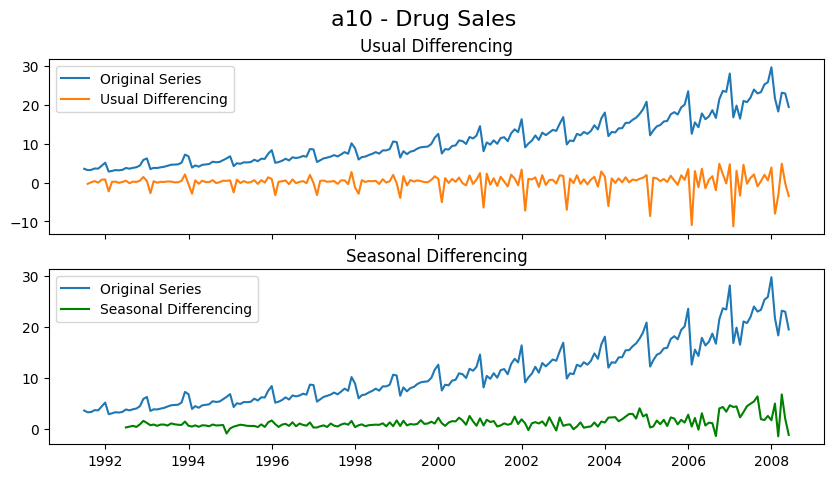

In [12]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasinal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

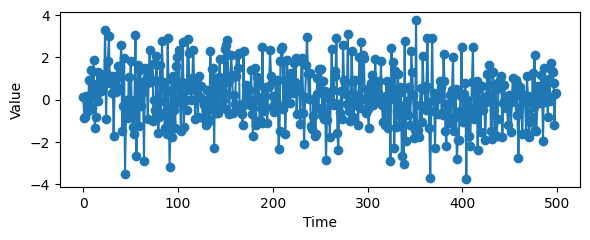

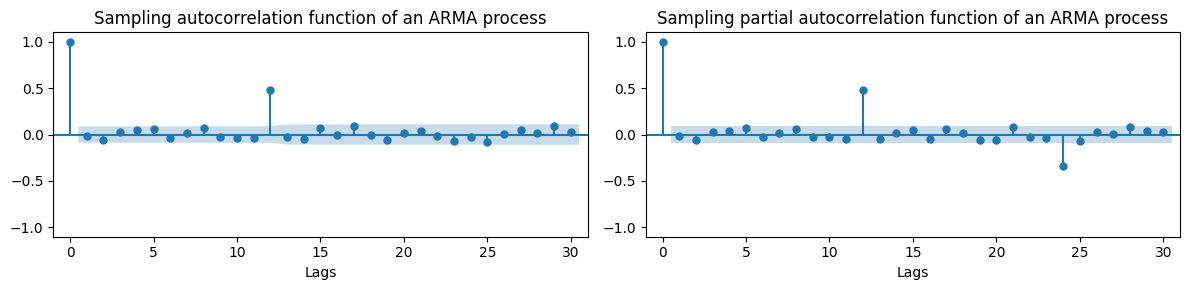

In [13]:
# SARIMA(0,0,0)(0,0,1,12)

arparams = np.array([])
maparams = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95])
arma_process = ArmaProcess(ar=np.r_[1, -arparams], ma=np.r_[1, maparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal)
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
plot_acf(y, ax=ax[0], lags=lags)
ax[0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1], lags=lags, method='ywm')
ax[1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  ax[i].set_xlim(-1, lags + 1)
  ax[i].set_ylim(-1.1, 1.1)
  ax[i].set_xlabel('Lags')

plt.tight_layout()
plt.show()

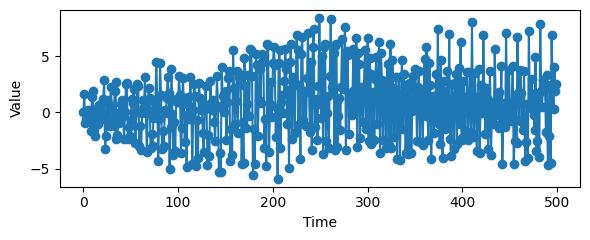

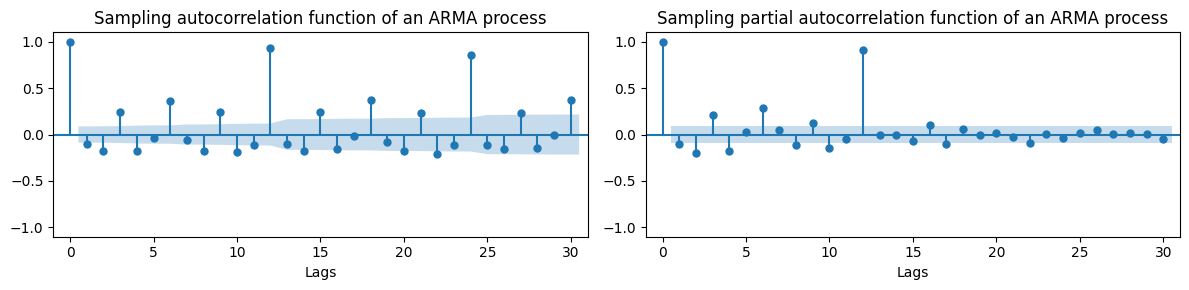

In [14]:
# SARIMA(0,0,0)(1,0,0,12)

arparams = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95])
maparams = np.array([])
arma_process = ArmaProcess(ar=np.r_[1, -arparams], ma=np.r_[1, maparams])
lags = 30

y = arma_process.generate_sample(500, distrvs=rng.normal)
plt.figure(figsize=(6, 2.5))
plt.plot(y, 'o-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
plot_acf(y, ax=ax[0], lags=lags)
ax[0].set_title("Sampling autocorrelation function of an ARMA process")
plot_pacf(y, ax=ax[1], lags=lags, method='ywm')
ax[1].set_title("Sampling partial autocorrelation function of an ARMA process")

for i in range(2):
  ax[i].set_xlim(-1, lags + 1)
  ax[i].set_ylim(-1.1, 1.1)
  ax[i].set_xlabel('Lags')

plt.tight_layout()
plt.show()

# 2. VAR Model

## We will visualize an example VAR(1) model

\begin{align*}
Y_{1,t} &= 5 + 0.2 Y_{1,t-1} + 0.3 Y_{2,t-1} + e_{1,t} \\
Y_{2,t} &= 3 - 0.6 Y_{1,t-1} + 1.1 Y_{2,t-1} + e_{2,t} \\
\end{align*}

### Simulate VAR model using statsmodels.tsa.vector_ar.var_model.VARProcess

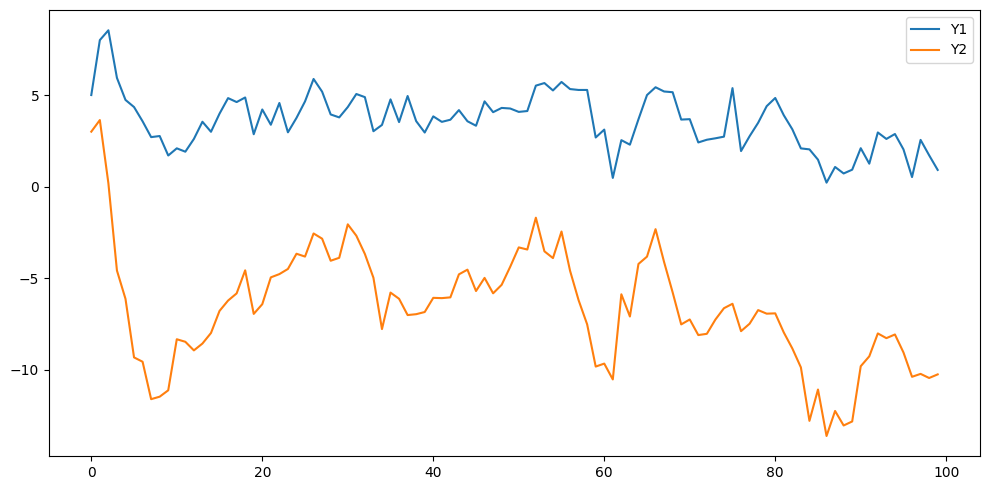

In [15]:
# model parameters 
intercept = np.array([5, 3])
coefs = np.array([[[0.2, 0.3], [-0.6, 1.1]]])
sigma_u = np.array([[1, 0.8],[0.8, 2]])

# simulate data
fit = statsmodels.tsa.vector_ar.var_model.VARProcess(coefs, intercept, sigma_u)
simul_values = fit.simulate_var(steps = 100, seed = 1)

# plot the figure
plt.figure(figsize=(10,5))
plt.plot(simul_values[:,0], label = "Y1")
plt.plot(simul_values[:,1], label = "Y2")
plt.legend()
plt.tight_layout()
plt.show()

# or you can do this all at once using the below code
#fit.plotsim(steps=100, seed=1)
#plt.tight_layout()
#plt.show()

### Exercise: compare the following two very simple cases to understand the interaction term in the VAR model

Case #1: $Y_{1,t}$ and $Y_{2,t}$ are independent

\begin{align*}
Y_{1,t} &= Y_{1,t-1} + e_{1,t} \\
Y_{2,t} &= Y_{2,t-1} + e_{2,t} \\
\end{align*}

Case #1: $Y_{1,t}$ and $Y_{2,t}$ have interaction term

\begin{align*}
Y_{1,t} &= Y_{1,t-1} + e_{1,t} \\
Y_{2,t} &= 0.5 Y_{1,t-1} + Y_{2,t-1} + e_{2,t} \\
\end{align*}

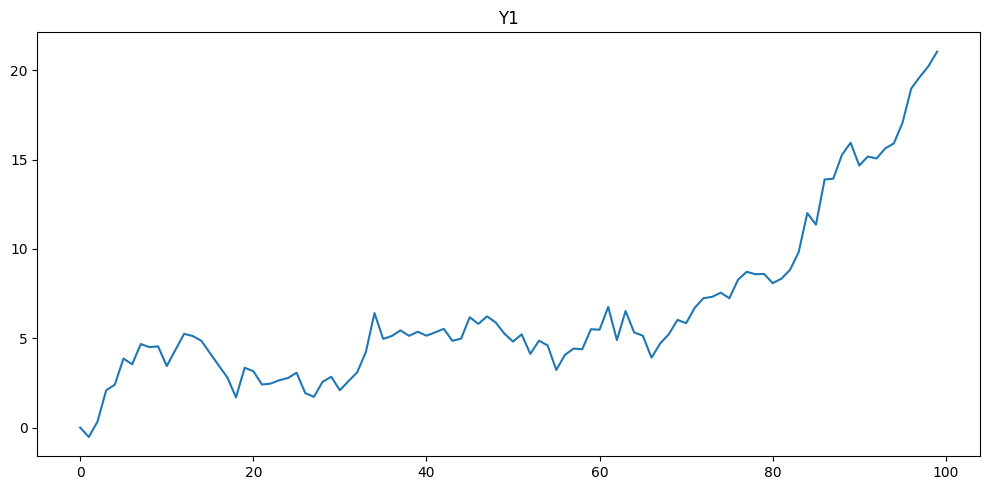

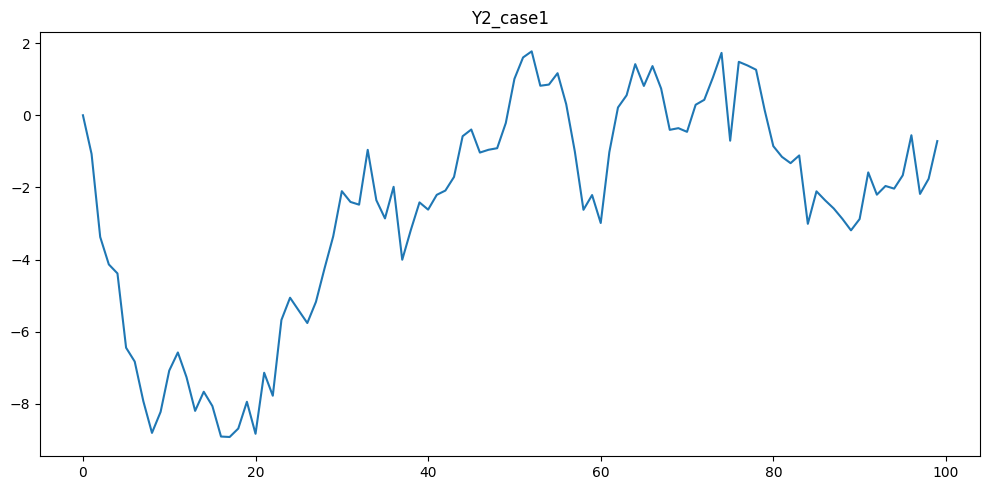

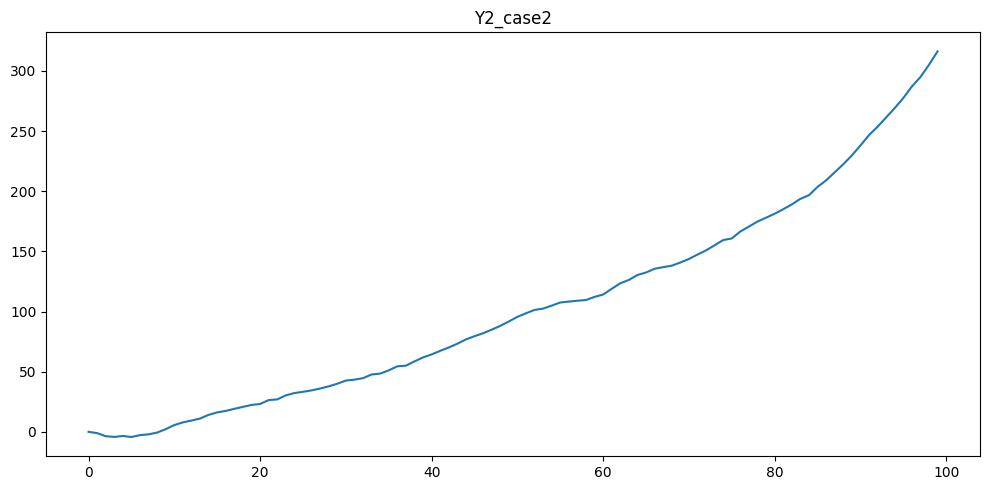

In [16]:
# model parameters 
intercept = np.array([0, 0])
coefs = np.array([[[1, 0], [0, 1]]])
sigma_u = np.array([[1, 0],[0, 1]])

# simulate data
fit = statsmodels.tsa.vector_ar.var_model.VARProcess(coefs, intercept, sigma_u)
simul_values_case1 = fit.simulate_var(steps = 100, seed = 1)

# model parameters 
intercept = np.array([0, 0])
coefs = np.array([[[1, 0], [0.5, 1]]])
sigma_u = np.array([[1, 0],[0, 1]])

# simulate data
fit = statsmodels.tsa.vector_ar.var_model.VARProcess(coefs, intercept, sigma_u)
simul_values_case2 = fit.simulate_var(steps = 100, seed = 1)

# plot the figure
plt.figure(figsize=(10,5))
plt.plot(simul_values_case1[:,0])
plt.title("Y1")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(simul_values_case1[:,1], label = "Y2_case1")
plt.title("Y2_case1")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(simul_values_case2[:,1])
plt.title("Y2_case2")
plt.tight_layout()
plt.show()

### We can also use statsmodels.tsa.vector_ar.util.varsim for VAR simulation

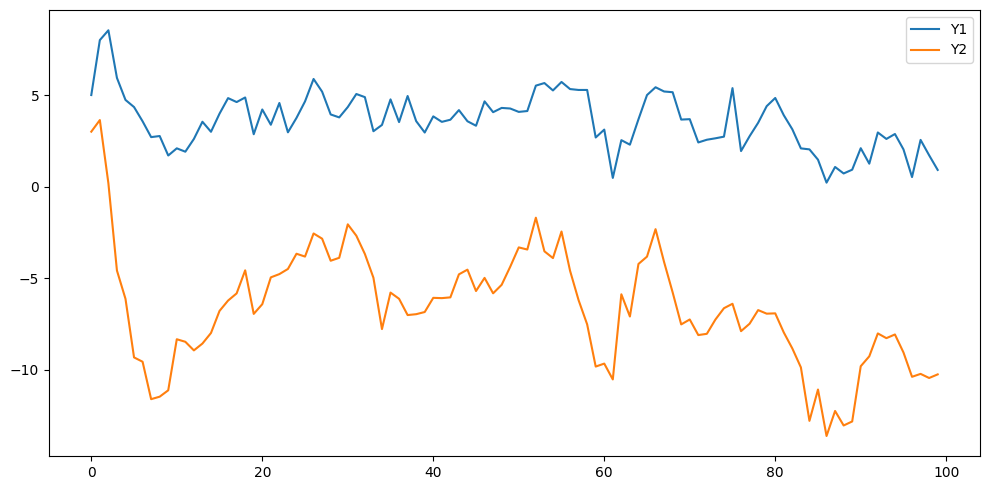

In [17]:
# model parameters 
intercept = np.array([5, 3])
coefs = np.array([[[0.2, 0.3], [-0.6, 1.1]]])
sigma_u = np.array([[1, 0.8],[0.8, 2]])

simul_values = statsmodels.tsa.vector_ar.util.varsim(coefs, intercept, sigma_u, steps=100, seed = 1)

plt.figure(figsize=(10,5))
plt.plot(simul_values[:,0], label = "Y1")
plt.plot(simul_values[:,1], label = "Y2")
plt.legend()
plt.tight_layout()
plt.show()

### Fit the VAR model using sm.tsa.VAR

In [18]:
# simulate VAR model
intercept = np.array([5, 3])
coefs = np.array([[[0.2, 0.3], [-0.6, 1.1]]])
sigma_u = np.array([[1, 0.8],[0.8, 2]])

simul_values = statsmodels.tsa.vector_ar.util.varsim(coefs, intercept, sigma_u, steps=100, seed = 1)

# fit the VAR model
fit = sm.tsa.VAR(simul_values).fit()

### The fitted result has the following parameters

| 출력모듈 | 설명 |
|--------------|-------------------------------------------------|
| model | 추정 자료와 모형 차수 등을 가진 VAR 클래스 객체 |
| k_ar | AR 차수 |
| coefs | 추정된 AR 계수 |
| intercept | 추정된 trend constant |
| params | 추정된 전체 계수 (trend constant 포함) |
| bse | 추정된 전체 계수의 표준 오차 |
| tvalues | 추정된 계수의 t statistics |
| pvalues | 추정된 계수의 t statistics에 대한 p value |
| llf | Log Likelihood 값 |
| aic | AIC 값 |
| bic | AIC 값 |
| hqic | HQIC 값 |
| fittedvalues | 추정 모형에 의한 예측값 |
| resid | 추정 모형에 의한 잔차항(Residuals) |
| sigma_u | 추정 모형에 의한 잔차항의 분산 |

In [19]:
print(fit.coefs)

[[[ 0.13459757  0.3507766 ]
  [-0.65136861  1.10434087]]]


In [20]:
display(fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, Jun, 2023
Time:                     22:46:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.113719
Nobs:                     99.0000    HQIC:                 0.0200743
Log likelihood:          -272.794    FPE:                   0.957409
AIC:                   -0.0435615    Det(Omega_mle):        0.901919
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         5.415872         0.632473            8.563           0.000
L1.y1         0.134598         0.097057            1.387           0.166
L1.y2         0.350777         0.046319            7.573           0.000

Results for equation 

### Forecast future values using the fitter model

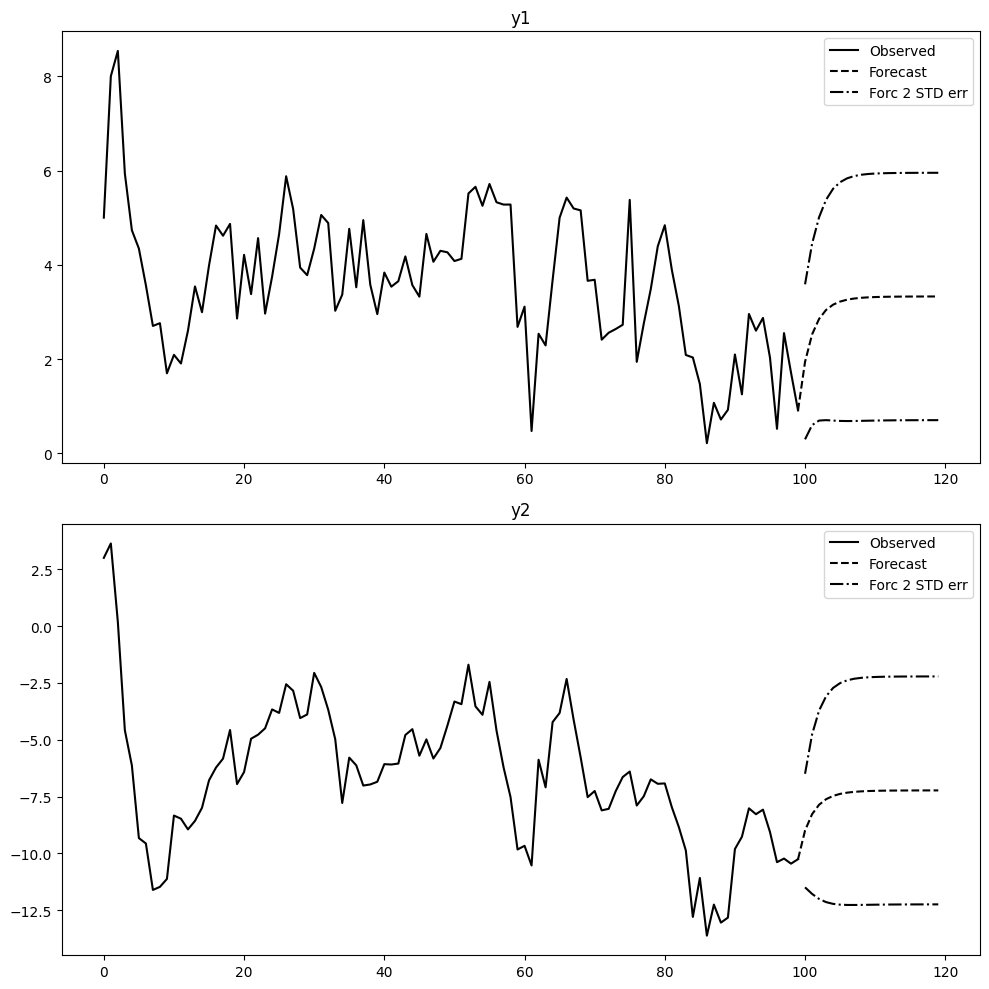

In [21]:
forecast_num = 20
pred_var = fit.forecast(fit.model.endog[-1:], steps=forecast_num)
pred_var_ci = fit.forecast_interval(fit.model.endog[-1:], steps=forecast_num)
fit.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

## Repeat the same process with US macroeconomic data

https://www.statsmodels.org/0.6.1/datasets/generated/macrodata.html

-------- raw data --------


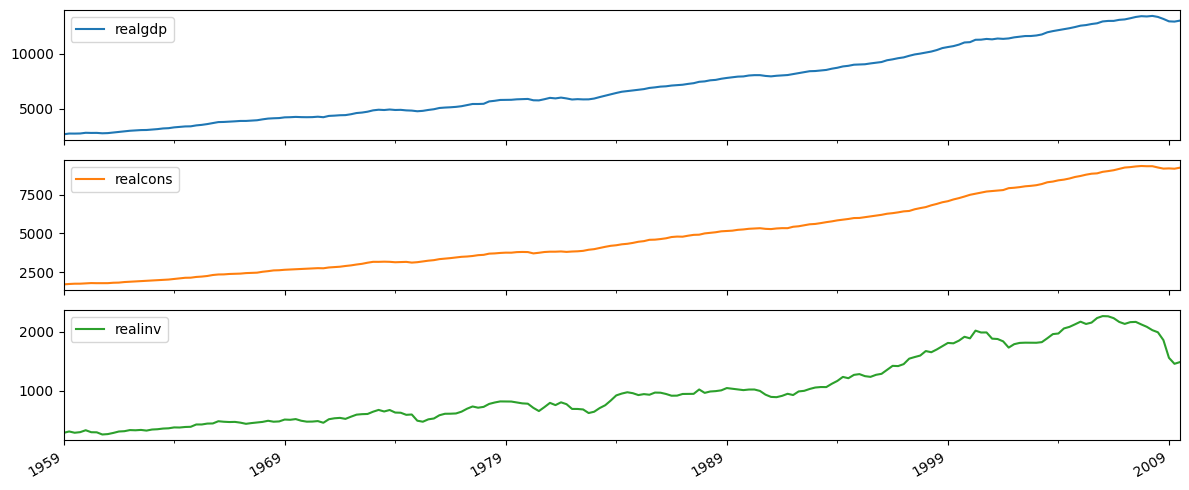

-------- order 1 difference --------


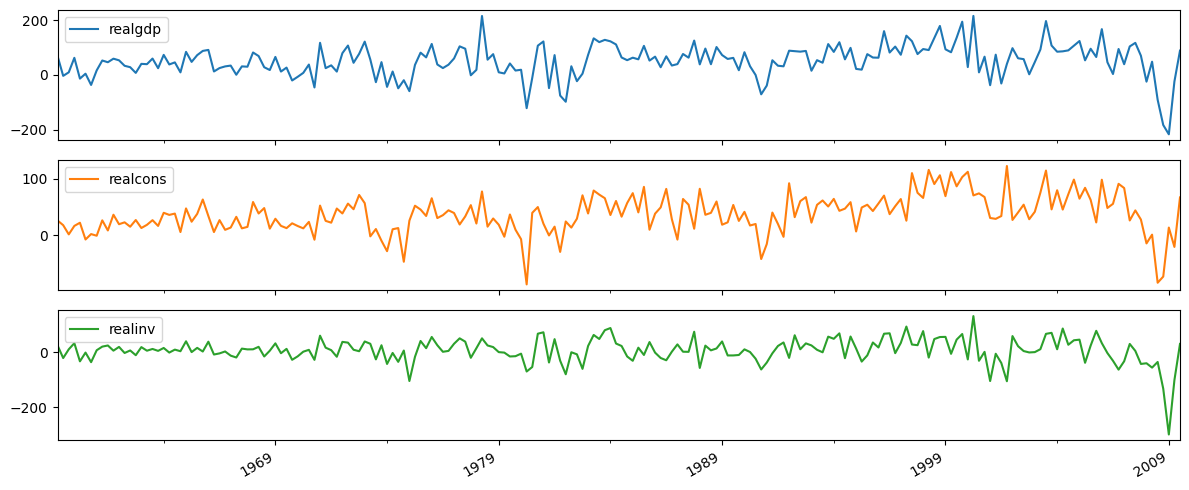

/home/juheonyi/.conda/envs/ml/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, Jun, 2023
Time:                     22:46:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.5675
Nobs:                     200.000    HQIC:                   20.3614
Log likelihood:          -2852.49    FPE:                6.05346e+08
AIC:                      20.2212    Det(Omega_mle):     5.45987e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              10.308143         6.425207            1.604           0.109
L1.realgdp         -0.394370         0.148481           -2.656           0.008
L1.realcons         1.185980         0.186610            6.355    

-------- forecasted values --------


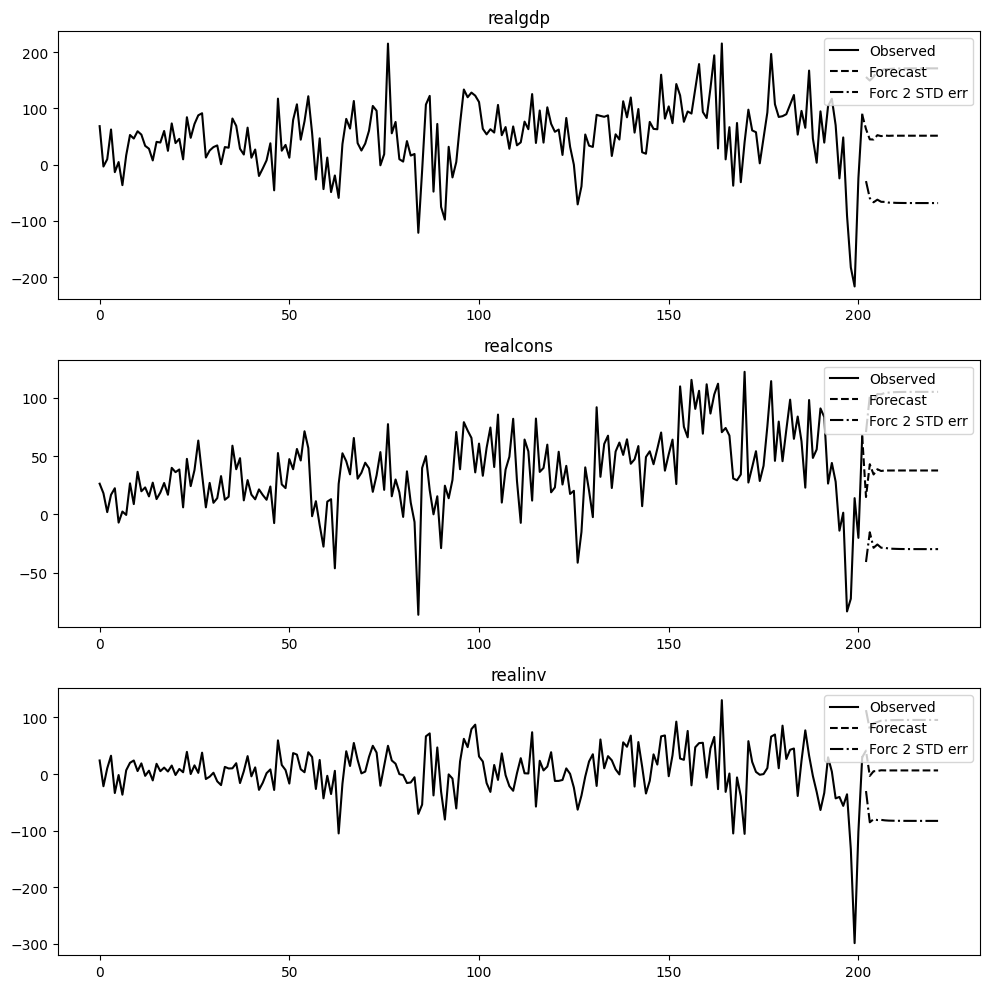

In [22]:
# load data
raw = sm.datasets.macrodata.load_pandas().data
dates_info = raw[['year', 'quarter']].astype(int).astype(str)
raw.index = pd.DatetimeIndex(sm.tsa.datetools.dates_from_str(dates_info['year'] + 'Q' + dates_info['quarter']))
raw_use = raw.iloc[:,2:5]

# visualize data
print("-------- raw data --------")
raw_use.plot(subplots=True, figsize=(12,5))
plt.tight_layout()
plt.show()

# visualize differenced data
print("-------- order 1 difference --------")
raw_use.diff(1).dropna().plot(subplots=True, figsize=(12,5))
plt.tight_layout()
plt.show()

# fit VAR model
raw_use_return = raw_use.diff(1).dropna()
fit = sm.tsa.VAR(raw_use_return).fit(maxlags=2)
display(fit.summary())

# forecast
forecast_num = 20
# pred_var = fit.forecast(fit.model.endog[-1:], steps=forecast_num)
# pred_var_ci = fit.forecast_interval(fit.model.endog[-1:], steps=forecast_num)

print("-------- forecasted values --------")
fit.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

# 3. Box-Jenkins Approach
Building the best ARIMA/SARIMA model
1. Identification: Determine the order of the parameters of SARIMA(p,d,q)(P,D,Q)s
2. Estimation: Train the parameters of the model.
3. Diagnostic checking: Evaluate the fitted model.

In [23]:
# Import WWWUsage data (The numbers of users connected to the internet through a server every minute)

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

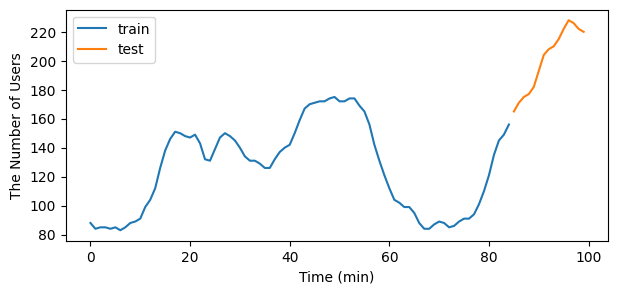

In [24]:
# Create Training and Test
train = df['value'][:85]
test = df['value'][85:]

plt.figure(figsize=(7, 3))
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.ylabel('The Number of Users')
plt.xlabel('Time (min)')
plt.legend()
plt.show()

## 3-1. Forecasting

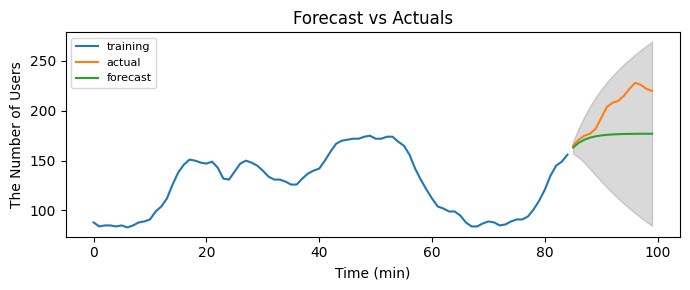

In [25]:
# Build a ARIMA Model
model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()  

# Forecast
forecast = fitted.get_forecast(len(test), alpha=0.05)  # 95% conf
fc = forecast.predicted_mean
conf = forecast.conf_int()

# Compare the forecast data and the actual data
def plot_forecast(train: pd.Series, test: pd.Series, fc: pd.Series, conf: pd.DataFrame):
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
    upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(7, 3))
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                    color='k', alpha=.15)
    plt.xlabel('Time (min)')
    plt.ylabel('The Number of Users')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.tight_layout()
    plt.show()

plot_forecast(train, test, fc, conf)

In [26]:
# Accuracy metrics
def forecast_accuracy(forecast: pd.Series, actual: pd.Series):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast.to_numpy()[:,None], 
                              actual.to_numpy()[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast.to_numpy()[:,None], 
                              actual.to_numpy()[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

{'mape': 0.12522186901784044,
 'me': -26.871496486888653,
 'mae': 26.871496486888653,
 'mpe': -0.12522186901784044,
 'rmse': 32.38238307206822,
 'acf1': 0.8714402833498296,
 'corr': 0.8528510838152515,
 'minmax': 0.12522186901784027}

## 3-2. Residual Diagnostics

In [27]:
def plot_residual(train: pd.Series, prediction: pd.Series):
  residual = train - prediction
  fig, ax = plt.subplots(2, 2, figsize=(14, 5))
  ax[0, 0].plot(prediction, label='fitted')
  ax[0, 0].plot(train, label='train')
  ax[0, 0].legend()
  ax[0, 0].set_title('Train data vs Fitted values')
  ax[0, 0].set_xlabel('Time (min)')
  ax[0, 0].set_ylabel('The Number of Users')
  ax[0, 1].plot(residual)
  ax[0, 1].set_title('Residuals')
  ax[0, 1].set_xlabel('Time (min)')
  ax[0, 1].set_ylabel('The Number of Users')
  plot_acf(residual, ax=ax[1, 0])
  ax[1, 0].set_xlabel('Lags')
  plot_pacf(residual, ax=ax[1, 1], method='ywm')
  ax[1, 1].set_xlabel('Lags')
  plt.tight_layout()
  plt.show()

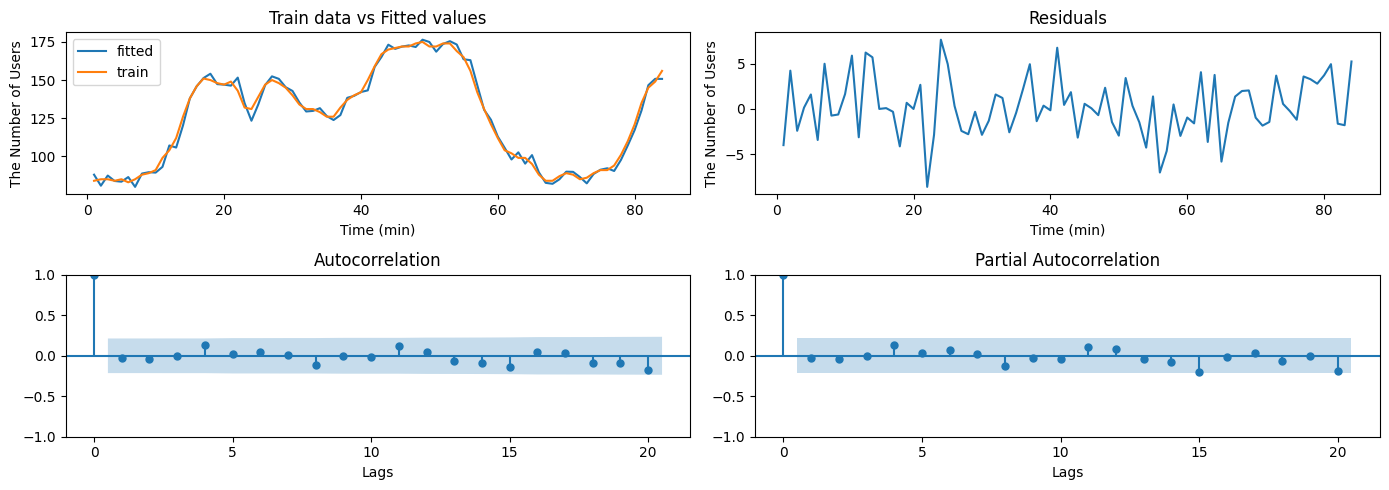

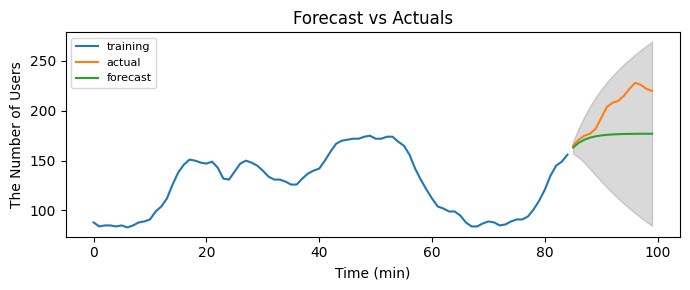

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -217.055
Date:                Wed, 28 Jun 2023   AIC                            440.109
Time:                        22:46:55   BIC                            447.402
Sample:                             0   HQIC                           443.041
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6597      0.097      6.790      0.000       0.469       0.850
ma.L1          0.4857      0.099      4.892      0.000       0.291       0.680
sigma2        10.1098      1.595      6.340      0.0

In [28]:
p, d, q = 1, 1, 1
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
prediction = model_fit.get_prediction().predicted_mean[d:]
forecast = model_fit.get_forecast(len(test), alpha=0.05)  # 95% conf
fc = forecast.predicted_mean
conf = forecast.conf_int()
plot_residual(train[d:], prediction)
plot_forecast(train, test, fc, conf)
print(model_fit.summary())

## 3-3. Detemining the order of differencing (d) (Manual)



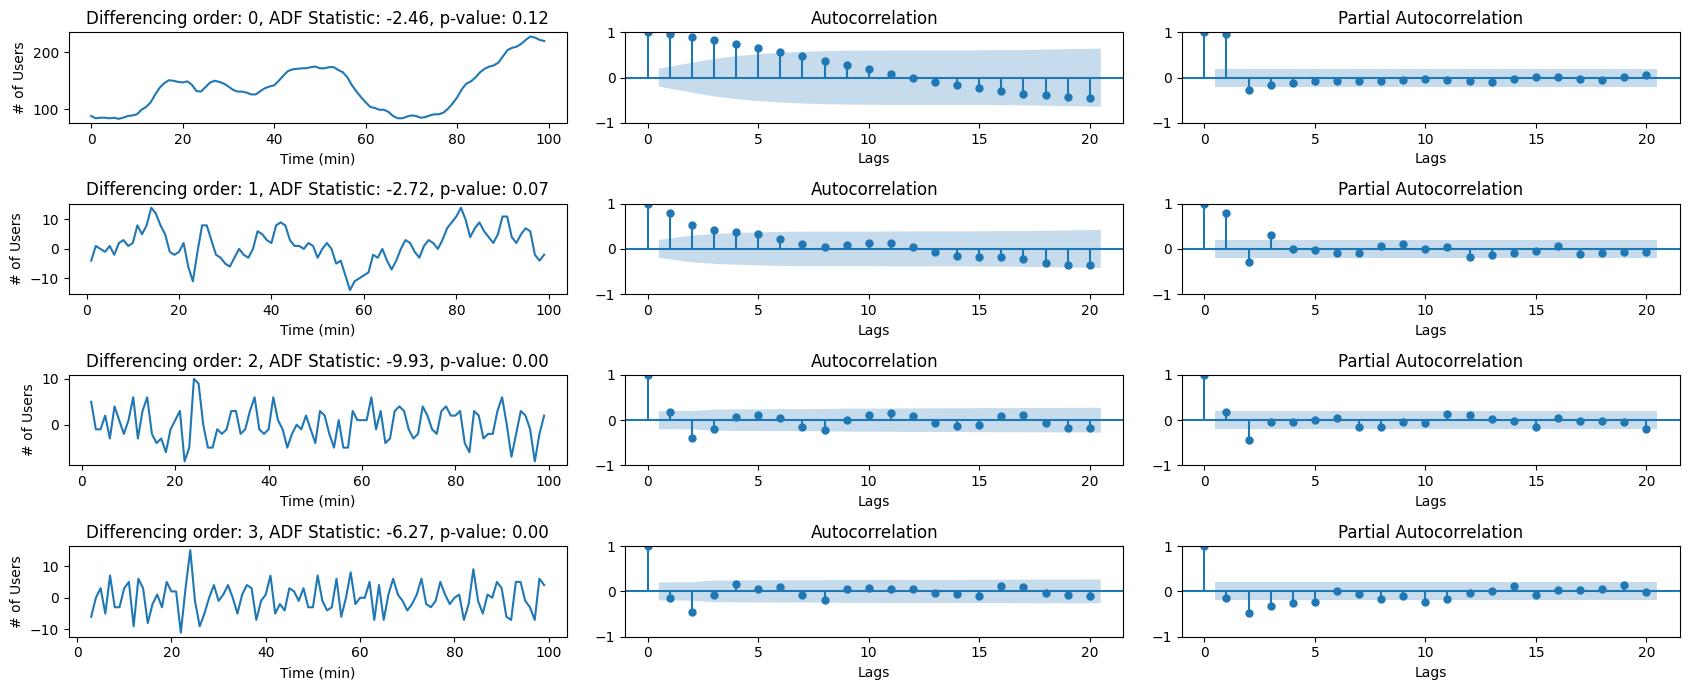

In [29]:
y = df['value']
fig, axes = plt.subplots(4, 3, figsize=(17, 7))
for i in range(4):
    result = adfuller(y)
    axes[i, 0].plot(y); axes[i, 0].set_title(
        f'Differencing order: {i}, ADF Statistic: {result[0]:.02f}, p-value: {result[1]:.02f}')
    axes[i, 0].set_xlabel('Time (min)')
    axes[i, 0].set_ylabel('# of Users')
    plot_acf(y, ax=axes[i, 1])
    axes[i, 1].set_xlabel('Lags')
    plot_pacf(y, ax=axes[i, 2], method='ywm')
    axes[i, 2].set_xlabel('Lags')
    y = y.diff().dropna()
plt.tight_layout()
plt.show()

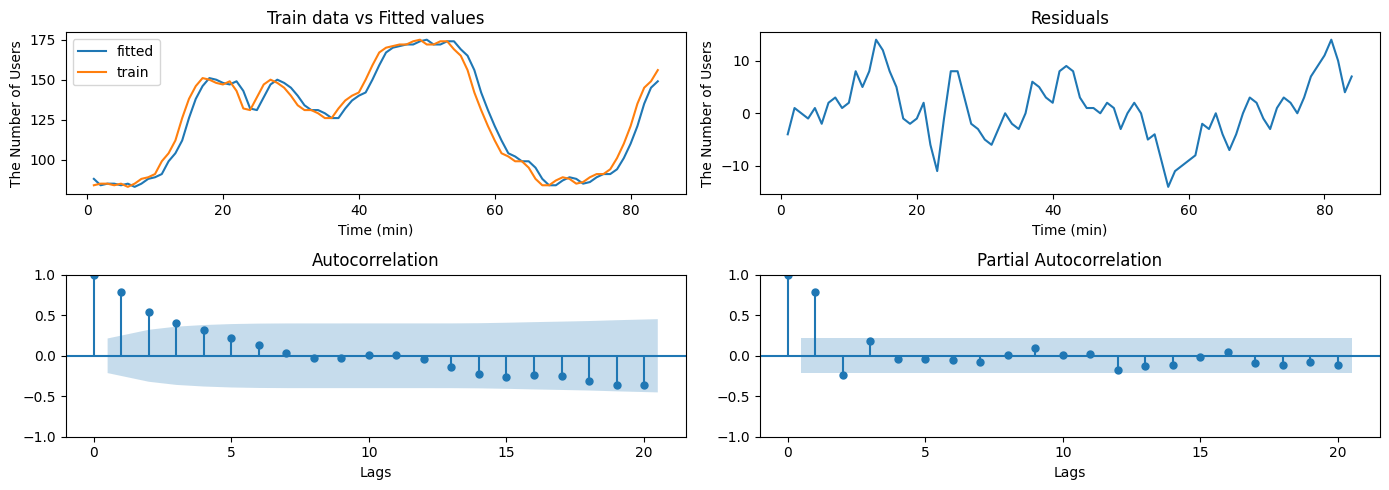

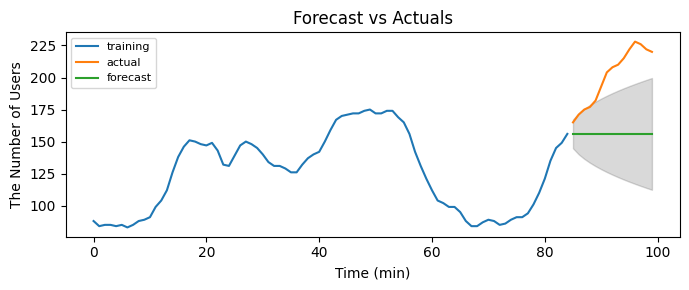

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -266.044
Date:                Wed, 28 Jun 2023   AIC                            534.088
Time:                        22:46:57   BIC                            536.519
Sample:                             0   HQIC                           535.065
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        33.0002      5.075      6.503      0.000      23.054      42.946
Ljung-Box (L1) (Q):                  54.59   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.00   Pr

In [30]:
p, d, q = 0, 1, 0
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
prediction = model_fit.get_prediction().predicted_mean[d:]
forecast = model_fit.get_forecast(len(test), alpha=0.05)  # 95% conf
fc = forecast.predicted_mean
conf = forecast.conf_int()
plot_residual(train[d:], prediction)
plot_forecast(train, test, fc, conf)
print(model_fit.summary())

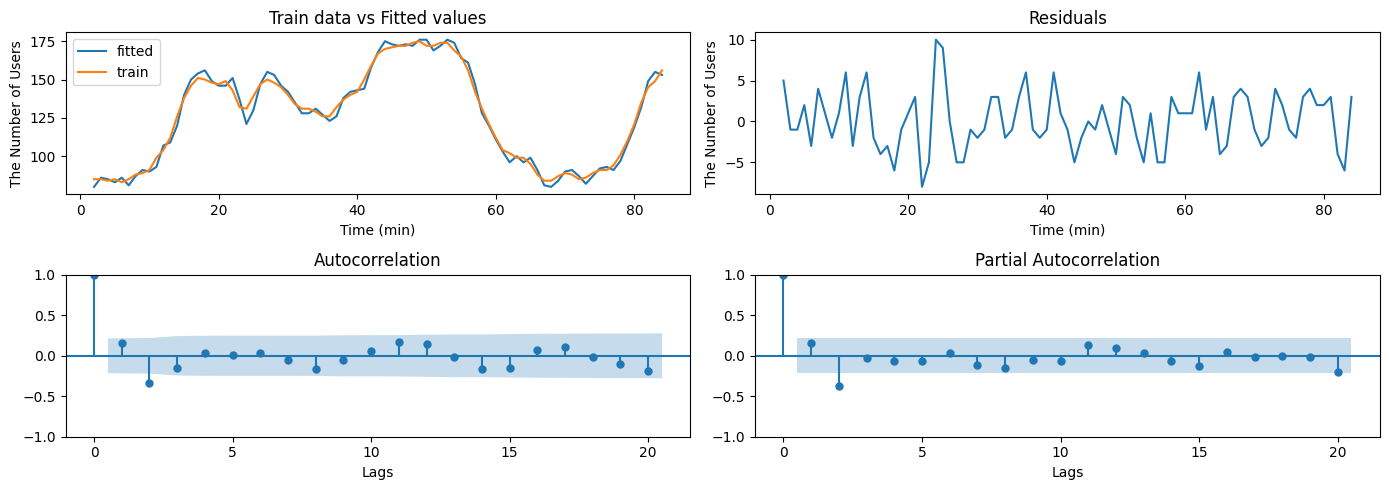

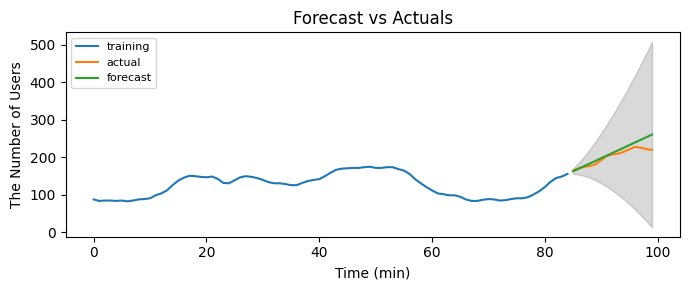

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -223.831
Date:                Wed, 28 Jun 2023   AIC                            449.662
Time:                        22:46:58   BIC                            452.081
Sample:                             0   HQIC                           450.634
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        12.8795      2.110      6.105      0.000       8.745      17.014
Ljung-Box (L1) (Q):                   2.10   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.15   Pr

In [31]:
p, d, q = 0, 2, 0
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
prediction = model_fit.get_prediction().predicted_mean[d:]
forecast = model_fit.get_forecast(len(test), alpha=0.05)  # 95% conf
fc = forecast.predicted_mean
conf = forecast.conf_int()
plot_residual(train[d:], prediction)
plot_forecast(train, test, fc, conf)
print(model_fit.summary())

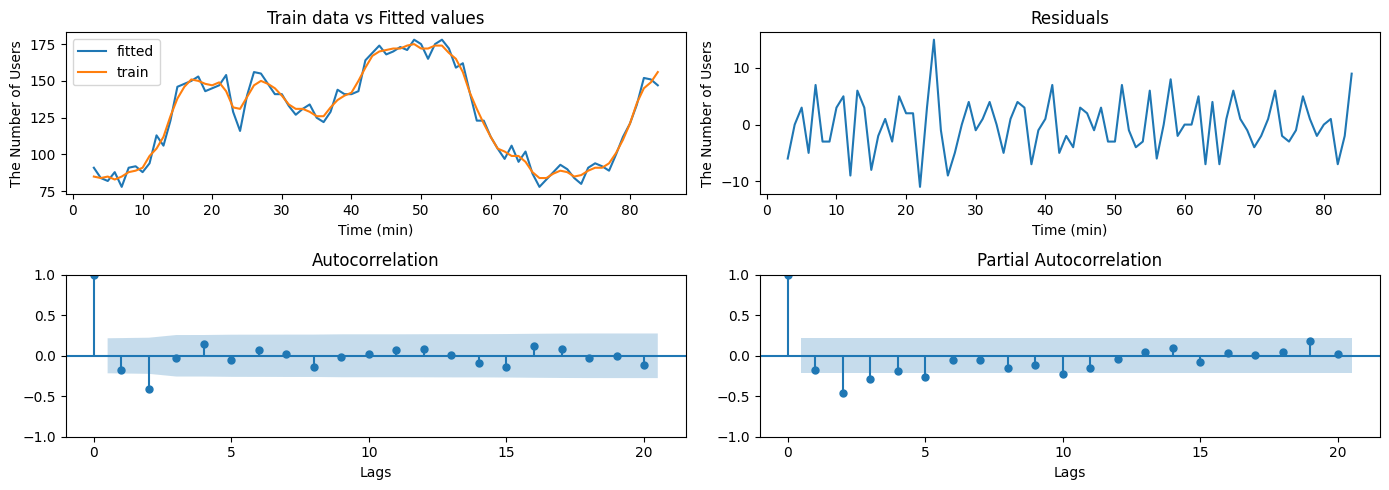

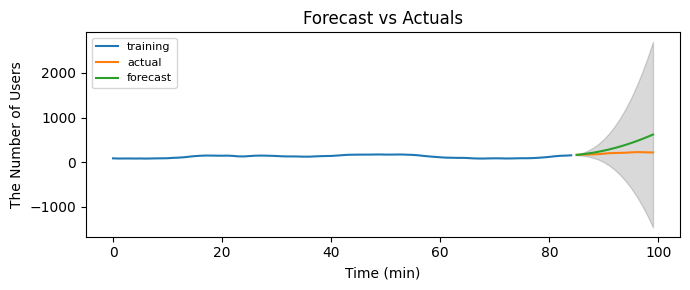

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(0, 3, 0)   Log Likelihood                -242.306
Date:                Wed, 28 Jun 2023   AIC                            486.611
Time:                        22:46:58   BIC                            489.018
Sample:                             0   HQIC                           487.577
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        21.5853      3.148      6.857      0.000      15.415      27.755
Ljung-Box (L1) (Q):                   2.73   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.10   Pr

In [32]:
p, d, q = 0, 3, 0
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
prediction = model_fit.get_prediction().predicted_mean[d:]
forecast = model_fit.get_forecast(len(test), alpha=0.05)  # 95% conf
fc = forecast.predicted_mean
conf = forecast.conf_int()
plot_residual(train[d:], prediction)
plot_forecast(train, test, fc, conf)
print(model_fit.summary())

## 3-4. Determining AR(p) and MA(q) parameters (Manual)


## Exercise: Find the optimal order of AR(p) and MA(q)

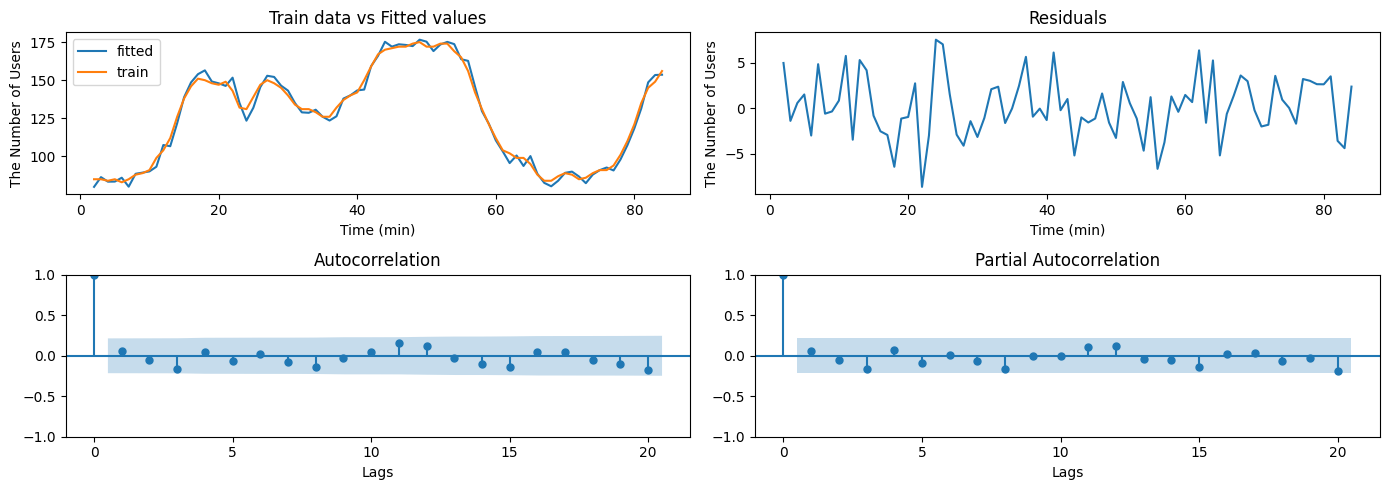

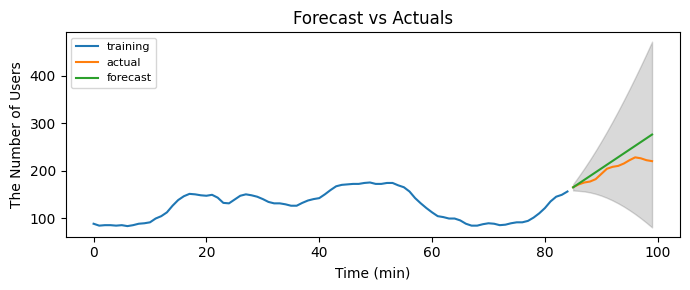

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -217.650
Date:                Wed, 28 Jun 2023   AIC                            441.300
Time:                        22:46:59   BIC                            448.557
Sample:                             0   HQIC                           444.215
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1278      0.114      1.126      0.260      -0.095       0.350
ma.L2         -0.3250      0.100     -3.262      0.001      -0.520      -0.130
sigma2        11.0626      1.851      5.977      0.0

In [33]:
# Add to remove lag 2 ACF

p, d, q = 0, 2, 2
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
prediction = model_fit.get_prediction().predicted_mean[d:]
forecast = model_fit.get_forecast(len(test), alpha=0.05)  # 95% conf
fc = forecast.predicted_mean
conf = forecast.conf_int()
plot_residual(train[d:], prediction)
plot_forecast(train, test, fc, conf)
print(model_fit.summary())

MA(2) seems to be redundant. P(p>|z|)=0.260 > 0.05

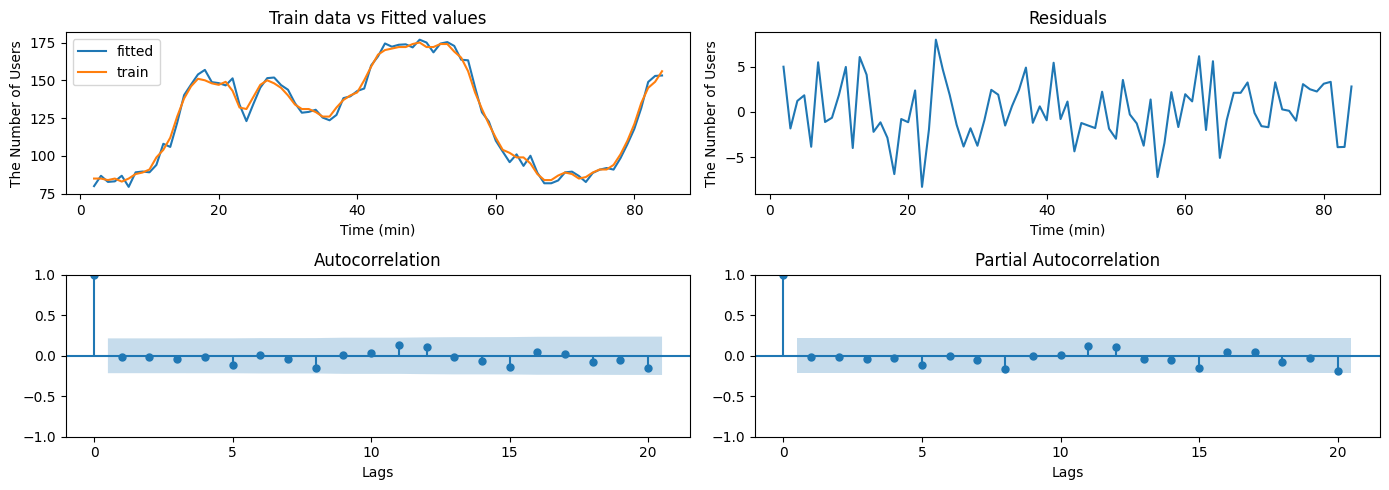

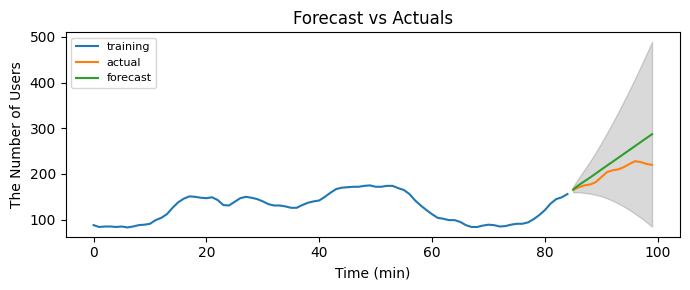

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -216.078
Date:                Wed, 28 Jun 2023   AIC                            438.156
Time:                        22:46:59   BIC                            445.412
Sample:                             0   HQIC                           441.071
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2328      0.108      2.160      0.031       0.022       0.444
ar.L2         -0.3962      0.096     -4.138      0.000      -0.584      -0.209
sigma2        10.6372      1.823      5.835      0.0

In [34]:
# Add to remove lag 2 PACF

p, d, q = 2, 2, 0
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
prediction = model_fit.get_prediction().predicted_mean[d:]
forecast = model_fit.get_forecast(len(test), alpha=0.05)  # 95% conf
fc = forecast.predicted_mean
conf = forecast.conf_int()
plot_residual(train[d:], prediction)
plot_forecast(train, test, fc, conf)
print(model_fit.summary())

## Building the best ARIMA(p,d,q) model (Automatic)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=447.705, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=451.549, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=451.463, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=447.707, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=449.662, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=441.862, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=439.922, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=441.881, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=438.156, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=449.569, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=440.125, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=440.111, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=445.820, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

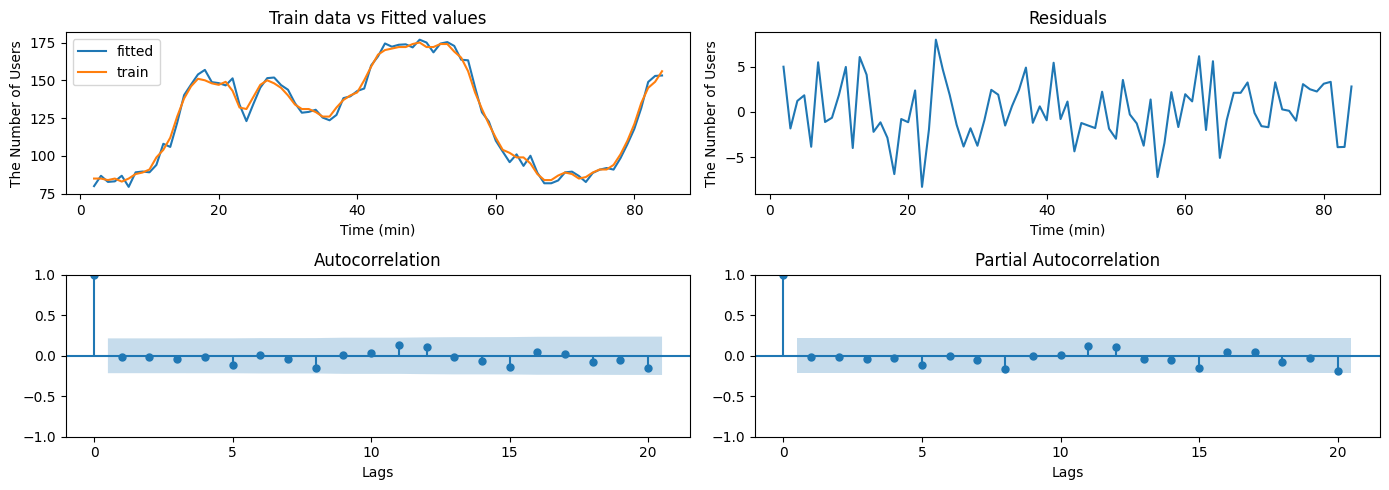

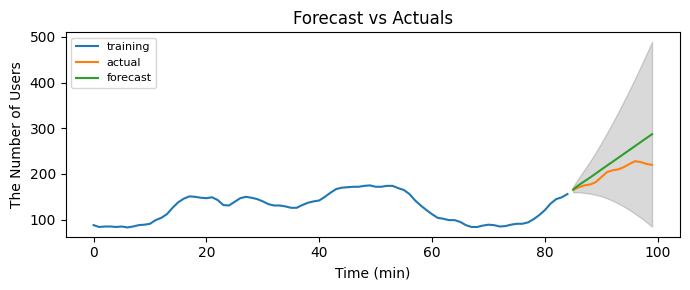

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -216.078
Date:                Wed, 28 Jun 2023   AIC                            438.156
Time:                        22:47:01   BIC                            445.412
Sample:                             0   HQIC                           441.071
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2328      0.108      2.160      0.031       0.022       0.444
ar.L2         -0.3962      0.096     -4.138      0.000      -0.584      -0.209
sigma2        10.6372      1.823      5.835      0.0

In [35]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True)

p, d, q = model.get_params()['order']
prediction = pd.Series(model.predict_in_sample(), index=train.index).iloc[d:]
fc, conf = model.predict(15, return_conf_int=True)
forecast_timestamp = np.arange(train.index[-1] + 1, train.index[-1] + 16)
fc = pd.Series(fc, index=forecast_timestamp)
conf = pd.DataFrame(conf, index=forecast_timestamp)
plot_residual(train[d:], prediction)
plot_forecast(train, test, fc, conf)
print(model.summary())

In [36]:
forecast_accuracy(fc, test)

{'mape': 0.12087102665046712,
 'me': 25.600220583913647,
 'mae': 25.600220583913647,
 'mpe': 0.12087102665046712,
 'rmse': 31.275309607285603,
 'acf1': 0.7014264599001329,
 'corr': 0.9564224030358662,
 'minmax': 0.10371075524040851}

## Exercise: Finding the best SARIMA model

In [37]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
train = data['value'][:180]
test = data['value'][180:]
train.index = pd.DatetimeIndex(train.index.values, freq='MS')
test.index = pd.DatetimeIndex(test.index.values, freq='MS')

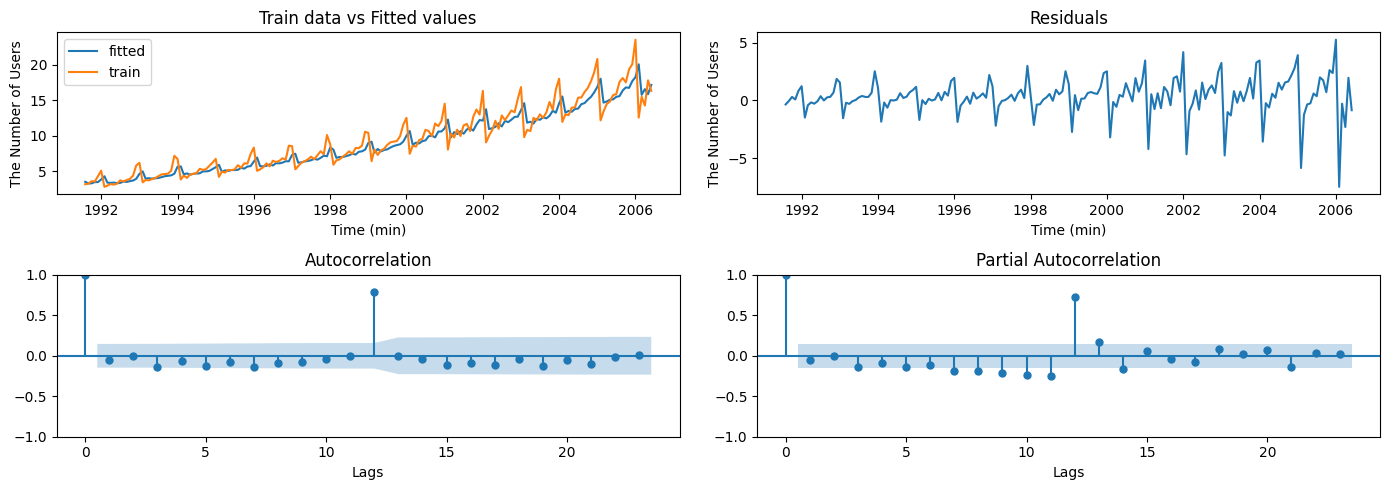

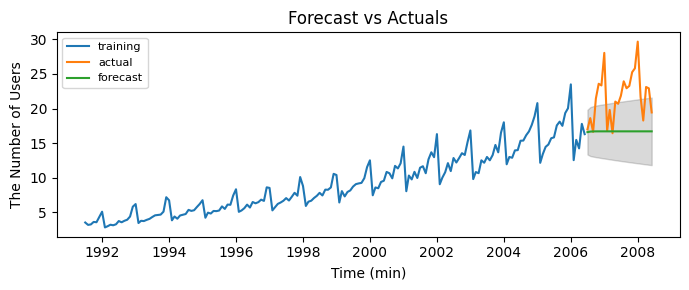

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  180
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -343.807
Date:                Wed, 28 Jun 2023   AIC                            693.613
Time:                        22:47:01   BIC                            703.175
Sample:                    07-01-1991   HQIC                           697.490
                         - 06-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2840      0.165      1.724      0.085      -0.039       0.607
ma.L1         -0.8438      0.078    -10.753      0.000      -0.998      -0.690
sigma2         2.7160      0.214     12.685      0.0

In [38]:
p, d, q = 1, 1, 1
P, D, Q, s = 0, 0, 0, 12
model = ARIMA(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()
prediction = model_fit.get_prediction().predicted_mean[d + D * s:]
forecast = model_fit.get_forecast(len(test), alpha=0.05)  # 95% conf
fc = forecast.predicted_mean
conf = forecast.conf_int()
plot_residual(train[d + D * s:], prediction)
plot_forecast(train, test, fc, conf)
print(model_fit.summary())

In [39]:
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                       max_p=3, max_q=3, m=12,
                       start_P=0, d=None, D=1,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=323.297, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=432.513, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=347.353, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=328.418, Time=0.15 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=327.395, Time=0.06 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=324.473, Time=0.31 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=323.093, Time=0.79 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=323.510, Time=1.38 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=326.893, Time=0.64 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=340.704, Time=0.51 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=320.357, Time=1.18 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=322.405, Time=0.31 sec
 ARIMA(2,1,1)(1,1,2)[12]             : AIC=321.224, Time=1.89 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=322.862, Time=0.57 sec
 ARIMA(2,1,0)(0,1,2)[12]         

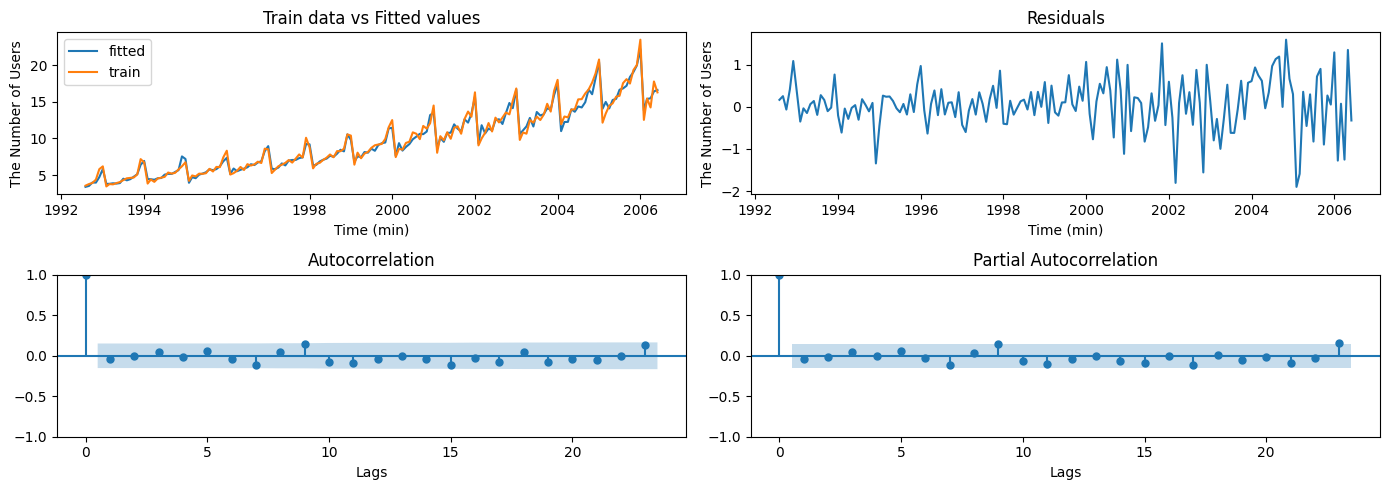

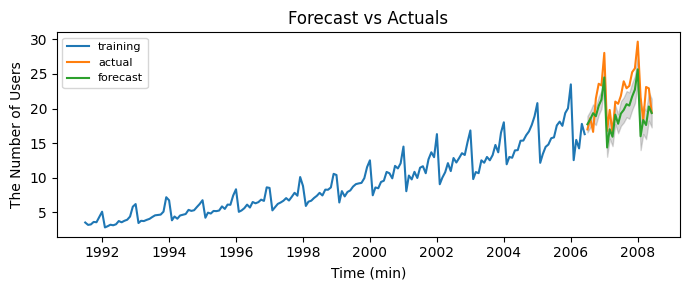

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  180
Model:             SARIMAX(2, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -154.179
Date:                                 Wed, 28 Jun 2023   AIC                            320.357
Time:                                         22:47:22   BIC                            339.065
Sample:                                     07-01-1991   HQIC                           327.950
                                          - 06-01-2006                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0075      0.078      0.096      0.923      -0.145       0

In [40]:
p, d, q = smodel.get_params()['order']
P, D, Q, s = smodel.get_params()['seasonal_order']
prediction = pd.Series(smodel.predict_in_sample(), index=train.index).iloc[d + D * s:]
fc, conf = smodel.predict(24, return_conf_int=True)
forecast_timestamp = pd.date_range(test.index[0], periods=len(test), freq='MS')
fc = pd.Series(fc, index=forecast_timestamp)
conf = pd.DataFrame(conf, index=forecast_timestamp)
plot_residual(train[d + D * s:], prediction)
plot_forecast(train, test, fc, conf)
print(smodel.summary())